In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import scipy.stats as st

%matplotlib inline 

C:\Users\Виктория\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Обнаружение аномалий и выбросов:<br>
-контекстуально (150 лет человеку) <br>
-статистические методы (распределение, боксплот, квантили)<br>

# Удаление дубликатов в данных

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

Всегда ли удалять? Нет. Например, в задачах классификации можно оставить. [Метод решения с копированием данных]

In [4]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [5]:
data.T.drop_duplicates().T #удаление одной из повторяющихся колонн: k2 - k3; транспонируем датафрейм - отбрасываем дубликаты (как выше) - обратное транспонирование

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [6]:
data.drop(data.columns[data.nunique() == 1], axis=1) #k4 содержит одинаковые значения (т.е. одно уникальное), от неё нет толку

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [7]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [8]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [9]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [10]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [11]:
data.dropna() #удаление каждой строки с хотя бы одним пропуском

,0,1,2,3


In [12]:
data.dropna(how="all") #удаление строк, где все значения пропущены

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [13]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data.dropna(thresh=2) #удаляем, если более двух пропусков

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [15]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,0.133726,NaN,NaN
1,-0.222964,NaN,NaN
2,-1.302934,NaN,-0.711578
3,-0.417851,NaN,-1.436731
4,0.064207,0.464888,0.315378
5,-1.407599,-0.175735,-1.086044
6,0.161149,-2.105319,0.896888


In [16]:
df.fillna(0) #неоч

,0,1,2
0,0.133726,0.000000,0.000000
1,-0.222964,0.000000,0.000000
2,-1.302934,0.000000,-0.711578
3,-0.417851,0.000000,-1.436731
4,0.064207,0.464888,0.315378
5,-1.407599,-0.175735,-1.086044
6,0.161149,-2.105319,0.896888


In [17]:
df.fillna({1: 0.5, 2: 0}) #словарь: столбец-значение

,0,1,2
0,0.133726,0.500000,0.000000
1,-0.222964,0.500000,0.000000
2,-1.302934,0.500000,-0.711578
3,-0.417851,0.500000,-1.436731
4,0.064207,0.464888,0.315378
5,-1.407599,-0.175735,-1.086044
6,0.161149,-2.105319,0.896888


In [18]:
df.fillna(method="bfill") #билинейная интерполяция

,0,1,2
0,0.133726,0.464888,-0.711578
1,-0.222964,0.464888,-0.711578
2,-1.302934,0.464888,-0.711578
3,-0.417851,0.464888,-1.436731
4,0.064207,0.464888,0.315378
5,-1.407599,-0.175735,-1.086044
6,0.161149,-2.105319,0.896888


In [19]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,0.133726,NaN,-0.711578
1,-0.222964,NaN,-0.711578
2,-1.302934,0.464888,-0.711578
3,-0.417851,0.464888,-1.436731
4,0.064207,0.464888,0.315378
5,-1.407599,-0.175735,-1.086044
6,0.161149,-2.105319,0.896888


In [20]:
df.fillna(data.mean()) 

,0,1,2
0,0.133726,6.500000,3.000000
1,-0.222964,6.500000,3.000000
2,-1.302934,6.500000,-0.711578
3,-0.417851,6.500000,-1.436731
4,0.064207,0.464888,0.315378
5,-1.407599,-0.175735,-1.086044
6,0.161149,-2.105319,0.896888


In [21]:
df.fillna(data.median())

,0,1,2
0,0.133726,6.500000,3.000000
1,-0.222964,6.500000,3.000000
2,-1.302934,6.500000,-0.711578
3,-0.417851,6.500000,-1.436731
4,0.064207,0.464888,0.315378
5,-1.407599,-0.175735,-1.086044
6,0.161149,-2.105319,0.896888


Медиана более устойчива к выбросам

In [22]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0]) #выброс
    data_all.append(data)
    
data_all = np.array(data_all)

<Axes: >

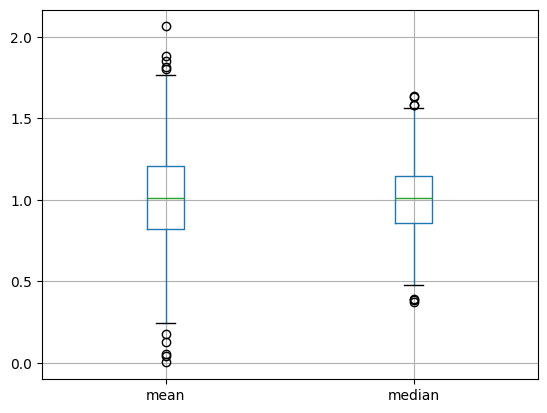

In [23]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)}) 
res.boxplot()

Создание дополнительного признака

In [24]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,0.133726,NaN,NaN,1
1,-0.222964,NaN,NaN,1
2,-1.302934,NaN,-0.711578,0
3,-0.417851,NaN,-1.436731,0
4,0.064207,0.464888,0.315378,0
5,-1.407599,-0.175735,-1.086044,0
6,0.161149,-2.105319,0.896888,0


Замена значений

In [25]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [26]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [27]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [28]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [30]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Недостаток: для ML 0-Москва, 1-Томск: близки друг к другу, хотя в реальности это не так. Другое дело, когда 0 - плохой или низкий уровень, 10 - хороший/высокий. 

In [31]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [32]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [33]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

Как закодировать дату? Месяц, выходной или нет, квартал

# Создание новых признаков

Полиномиальные признаки

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [37]:
poly = PolynomialFeatures(2) # степень 2: (1, а, б, а^2, аб, б^2) 
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<Axes: title={'center': '0'}>]], dtype=object)

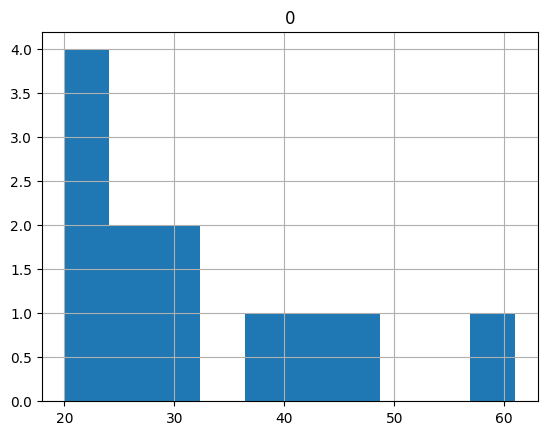

In [38]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [39]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [40]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

MinMaxScaler: от 0 до 1. 1=1, отриц 0, другие пропорционально.

In [42]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<Axes: ylabel='Density'>

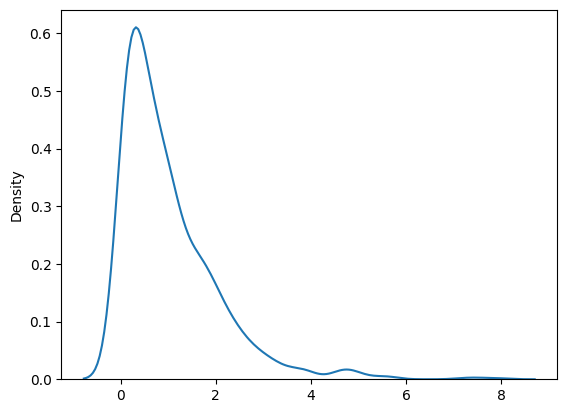

In [43]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<Axes: ylabel='Density'>

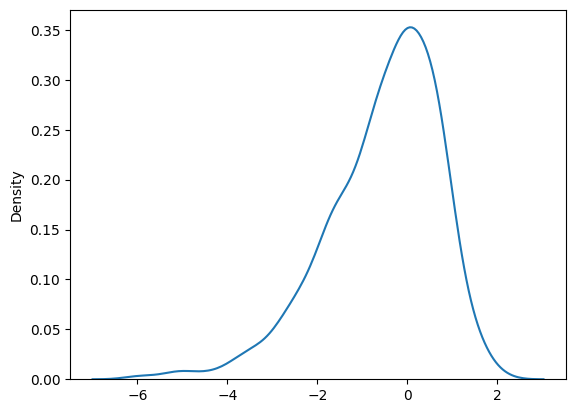

In [44]:
transformed_data = np.log(data) #логарифмируем
sns.distplot(transformed_data, hist=False, kde=True)

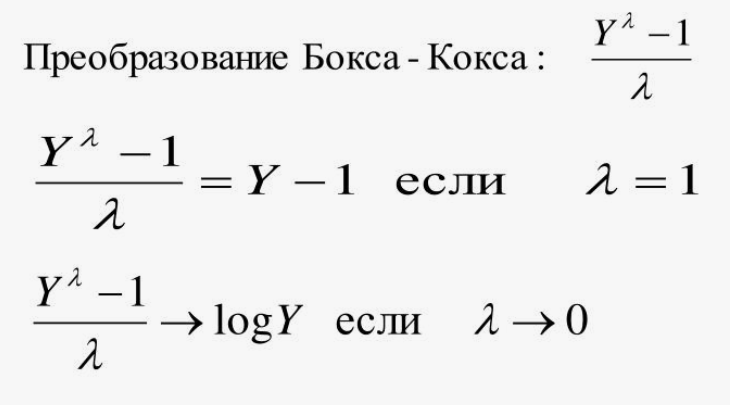

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<Axes: ylabel='Density'>

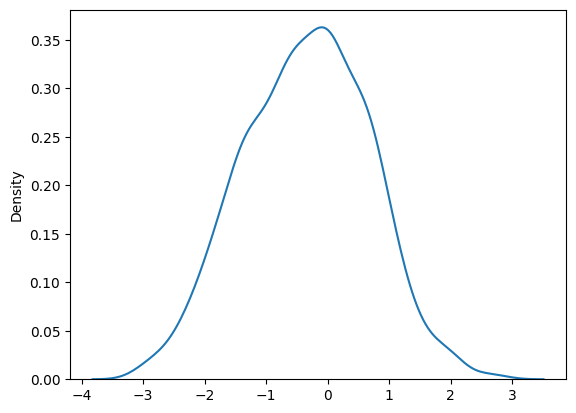

In [45]:
transformed_data, best_lambda = boxcox(data) #через метод максимального правдоподобия

sns.distplot(transformed_data, hist=False , kde=True)

In [46]:
best_lambda

0.2586379838945601

# Домашнее задание

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [48]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

## Предобработка

In [49]:
df.duplicated().sum()

0

In [50]:
df.isna().sum()

index                             0
back-suspension                   0
battery-capacity                  0
charge-time                       0
compression                       0
consumption-mixed                 0
cylinders-order                   0
cylinders-value                   0
engine-feeding                    0
engine-start                      0
engine-stop                       0
engine-type                       0
gear-type                         0
luxury                            0
max-speed                         0
power-electro-kw                  0
supply-system                     0
valves                            0
valvetrain                        0
weight                            0
configurations_auto-premiere      0
configurations_back-wheel-base    0
configurations_front-brake        0
configurations_safety-rating      0
configurations_seats              0
configurations_tank-volume        0
supergen_year-stop                0
models_country-from         

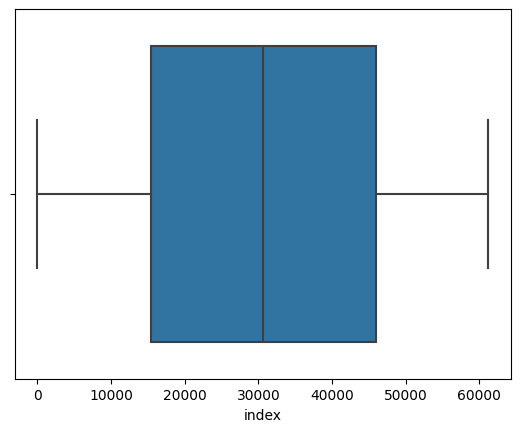

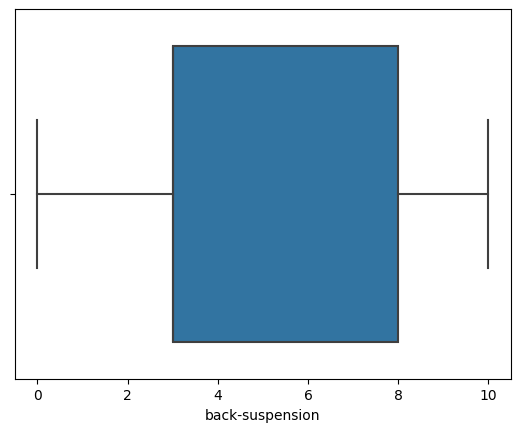

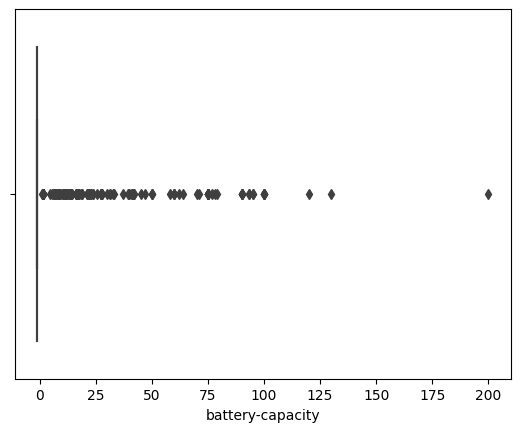

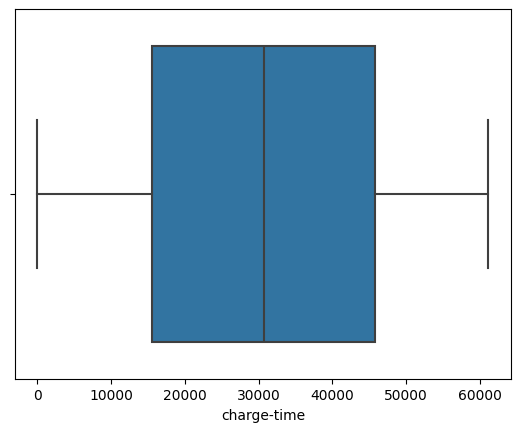

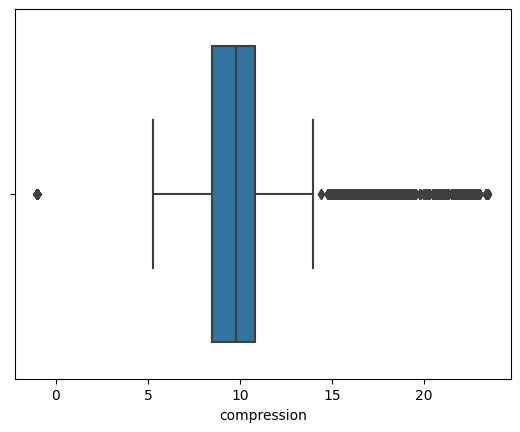

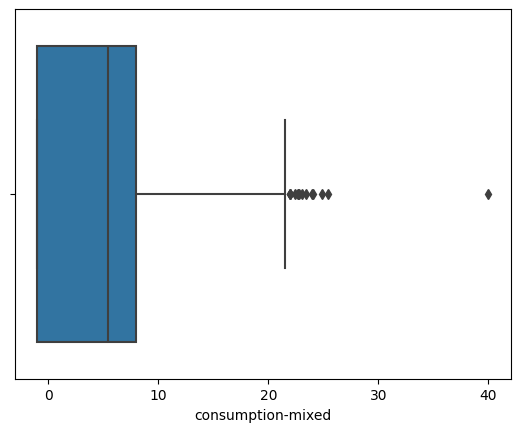

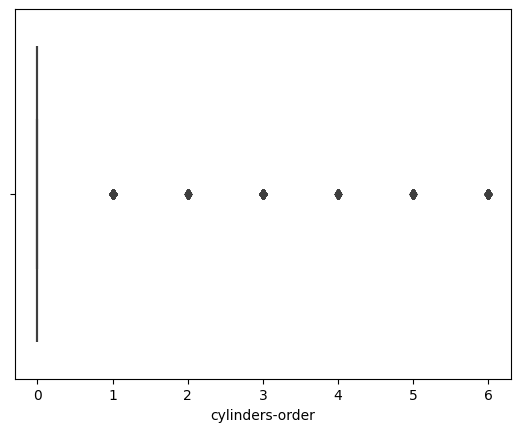

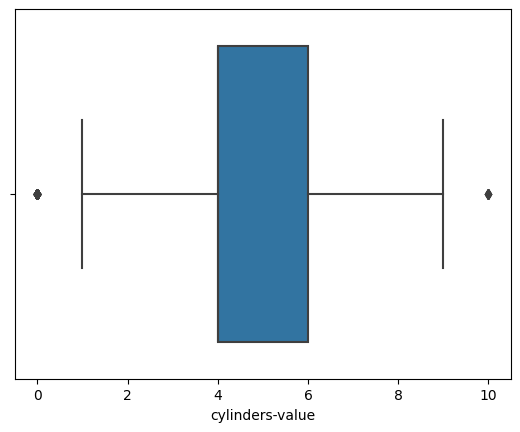

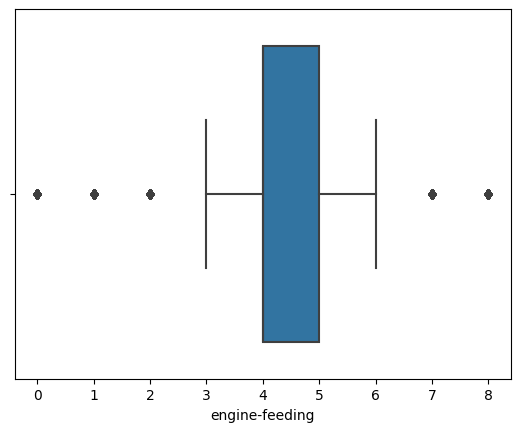

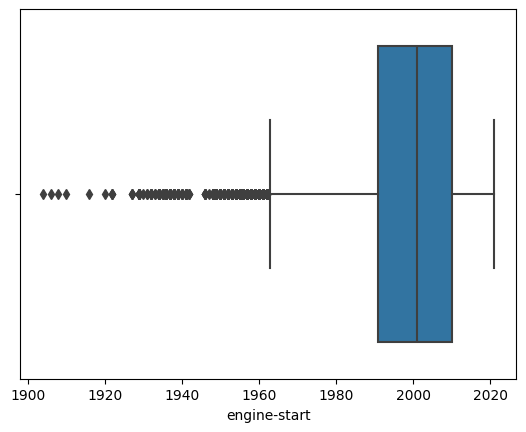

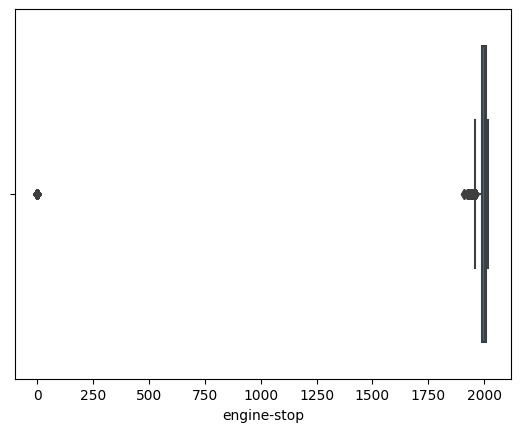

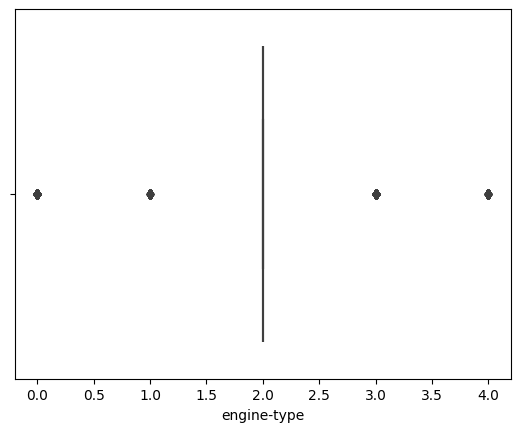

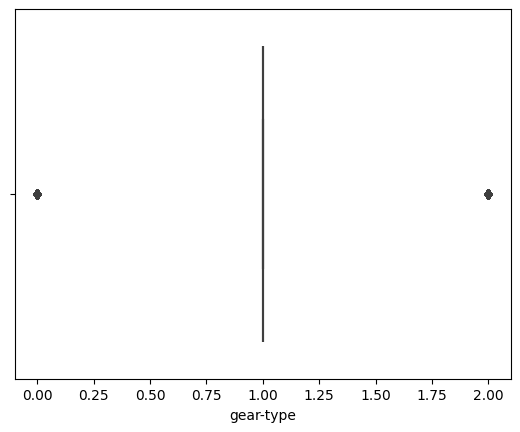

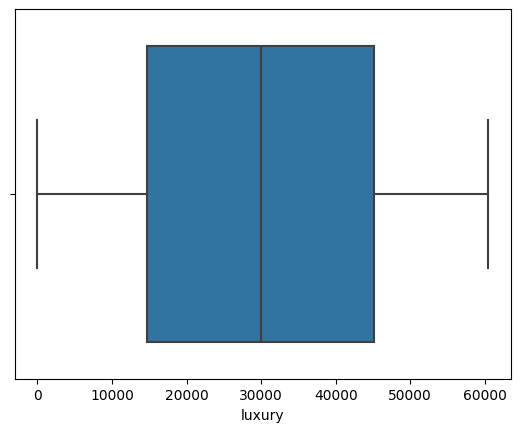

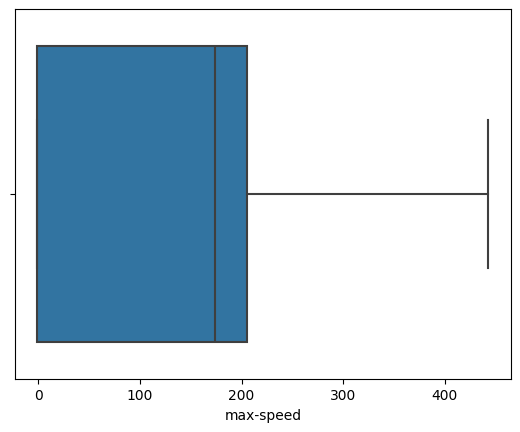

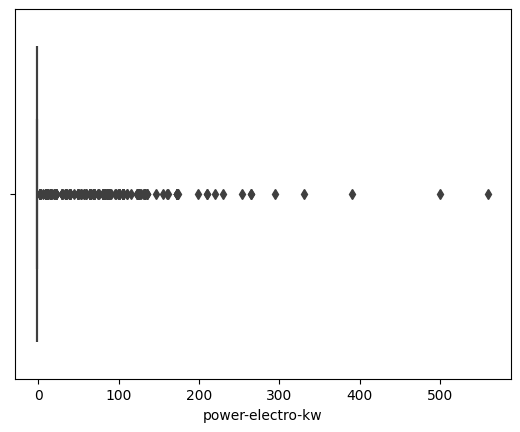

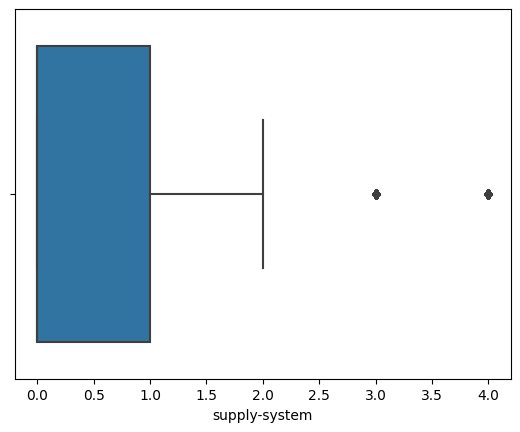

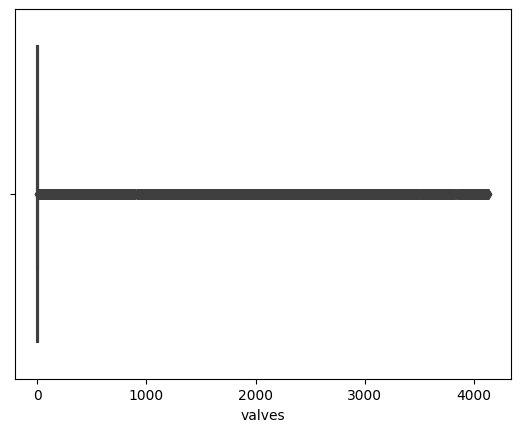

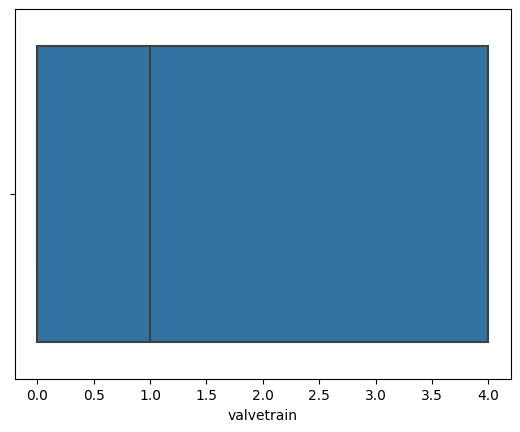

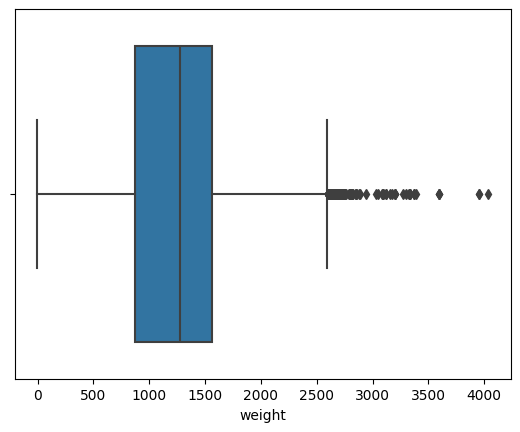

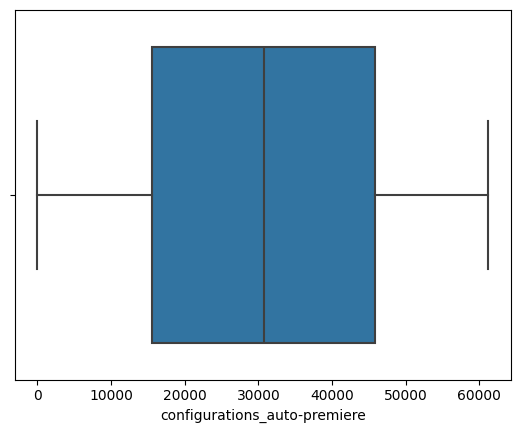

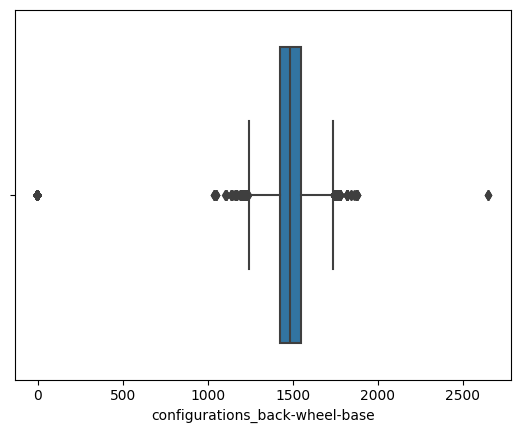

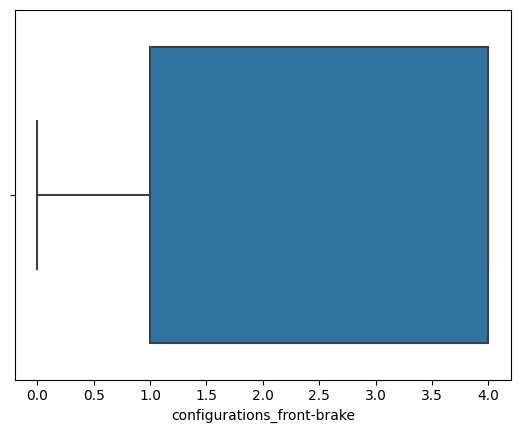

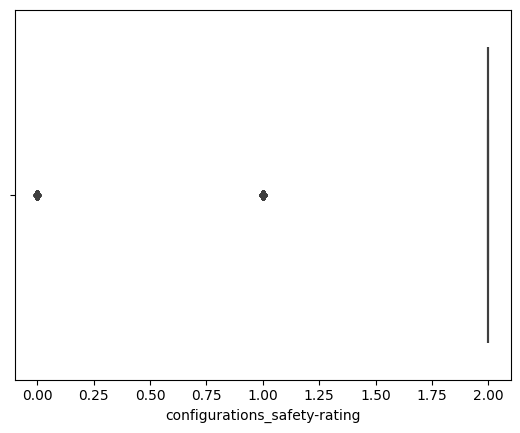

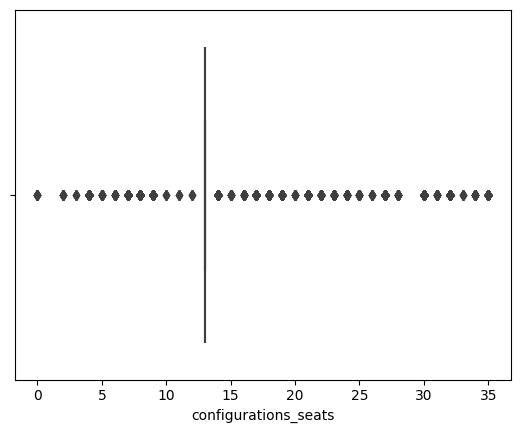

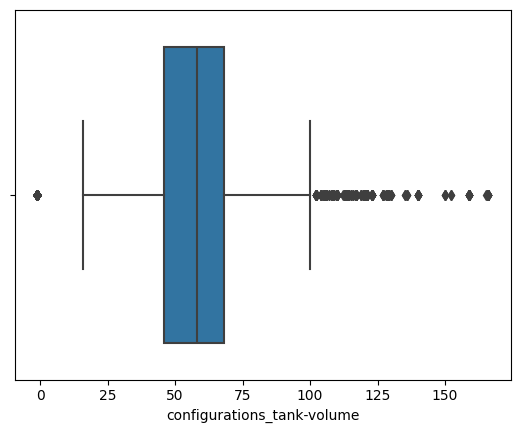

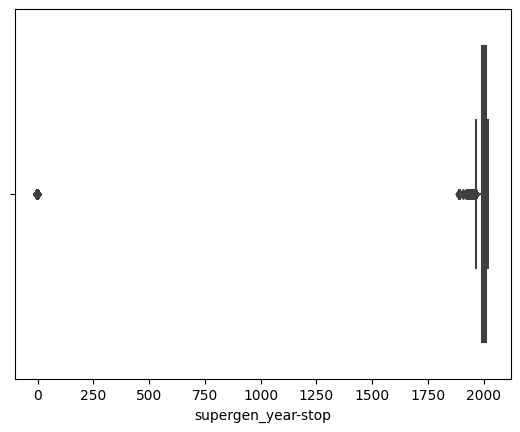

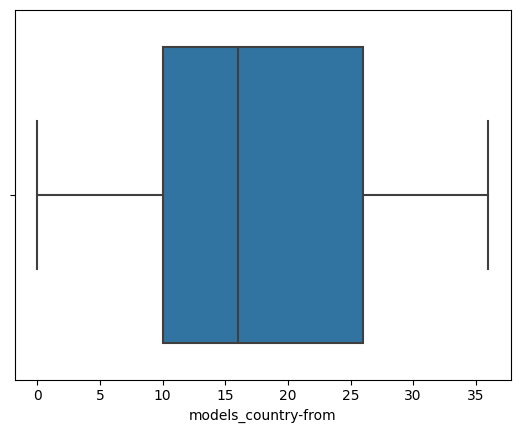

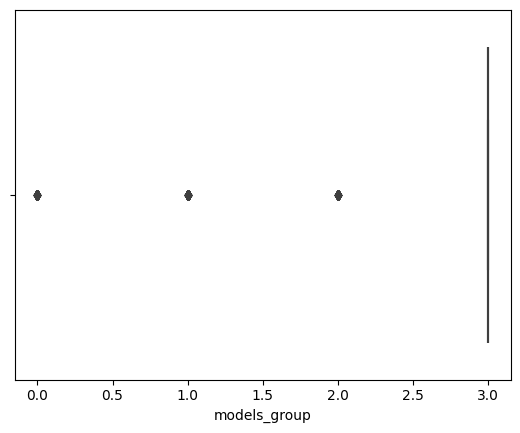

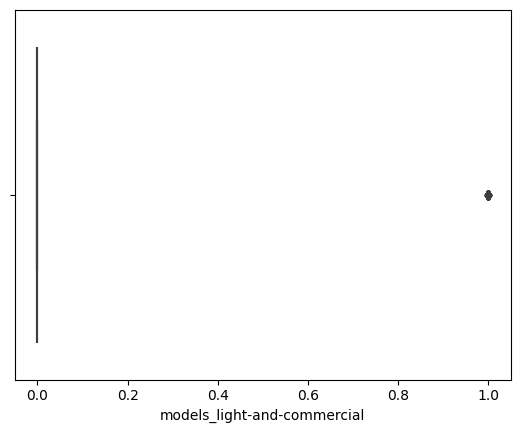

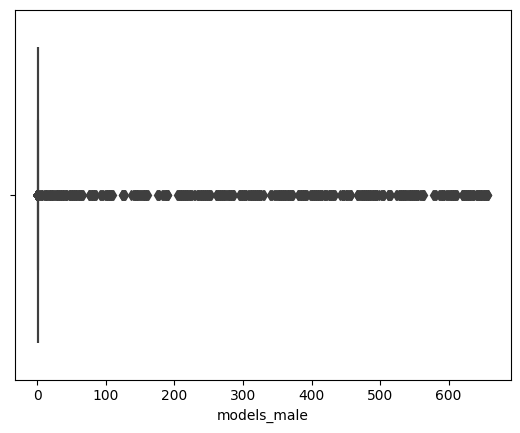

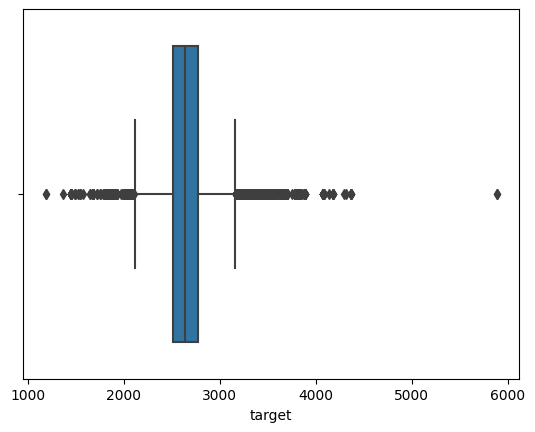

In [51]:
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.show()

Нет выбросов/похожи на категориальные переменные: index(нет), back-suspension(нет), charge-time(нет), cylinders-order(категориальная), engine-feeding(категориальная), engine-type(категориальная), gear-type(категориальная), luxury (нет), max-speed(нет), valvetrain(нет), configurations_auto-premiere(нет), configurations_front-brake(нет), configurations_safety-rating (категориальная), configurations_seats(), models_country-from(нет), models_group(категориальная), models_light-and-commercial(категориальная)

In [52]:
def ejection_iqr (col):
    q75 = np.percentile(df[col], 75)
    q25 = np.percentile(df[col], 25)
    iqr = q75 - q25
    ejection_h = q75 + iqr * 1.5
    ejection_l = q25 - iqr * 1.5
    ejection_count = df[col][(df[col] > ejection_h) | (df[col] < ejection_l)].count()
    ejection_perc = (ejection_count / len(df)) * 100
    return(ejection_h, ejection_l, ejection_count, ejection_perc)

In [53]:
def ejection_z (col):
    z = np.abs(st.zscore(df[col]))
    ejection_perc = len(df[(z>3)]) / len(df) * 100
    return(z, ejection_perc)

Постараемся не только улучшить модель, но и не потерять много данных.

### battery-capacity

In [54]:
ejection_iqr('battery-capacity')

(-1.0, -1.0, 152, 0.3514857208925888)

In [55]:
ejection_z('battery-capacity')[1]

0.2867383512544803

In [56]:
df = df[(ejection_z('battery-capacity')[0]<3)]

### compression

In [57]:
ejection_iqr('compression') #слишком большой процент выбросов, нельзя удалять так много

(14.250000000000002, 5.049999999999999, 16677, 38.674891584146934)

In [58]:
ejection_z('compression')[1]

0.0

### consumption-mixed

In [59]:
ejection_iqr('consumption-mixed') 

(21.5, -14.5, 14, 0.032466779527376456)

In [60]:
ejection_z('consumption-mixed')[1] 

0.10203844994318315

In [61]:
df = df[(df['consumption-mixed'] < ejection_iqr('consumption-mixed')[0]) & (df['consumption-mixed'] > ejection_iqr('consumption-mixed')[1])]

### cylinders-value

In [62]:
ejection_iqr('cylinders-value') #процент меньше

(9.0, 1.0, 27, 0.06263629193151765)

In [63]:
ejection_z('cylinders-value')[1]

0.7353964645292999

In [64]:
df = df[(df['cylinders-value'] < ejection_iqr('cylinders-value')[0]) & (df['cylinders-value'] > ejection_iqr('cylinders-value')[1])]

### engine-feeding

In [65]:
ejection_iqr('engine-feeding') #слишком большой процент

(6.5, 2.5, 12019, 28.088994835121177)

In [66]:
ejection_z('engine-feeding')[1] 

0.0

### engine-start

In [67]:
ejection_iqr('engine-start')

(2038.5, 1962.5, 635, 1.484026268433476)

In [68]:
ejection_z('engine-start')[1] 

1.058683306457267

In [69]:
df = df[(ejection_z('engine-start')[0]<3)]

### engine-stop

In [70]:
ejection_iqr('engine-stop') 

(2038.5, 1962.5, 4135, 9.767101284958429)

In [71]:
ejection_z('engine-stop')[1] 

9.686791383219955

### power-electro-kw

In [72]:
ejection_iqr('power-electro-kw') 

(-1.0, -1.0, 148, 0.3495842781557067)

In [73]:
ejection_z('power-electro-kw')[1] 

0.26218820861678005

In [74]:
df = df[(ejection_z('power-electro-kw')[0]<3)]

### supply-system

In [75]:
ejection_iqr('supply-system') 

(2.5, -1.5, 4603, 10.901124925991711)

In [76]:
ejection_z('supply-system')[1]

0.5541740674955595

In [77]:
df = df[(ejection_z('supply-system')[0]<3)]

### valves

In [78]:
ejection_iqr('valves') 

(5.0, -3.0, 2774, 6.606177514229239)

In [79]:
ejection_z('valves')[1] 

3.4388321306946725

In [80]:
df = df[(ejection_z('valves')[0]<3)]

### weight

In [81]:
ejection_iqr('weight') 

(2512.5, -3.5, 236, 0.5820405948652182)

In [82]:
ejection_z('weight')[1] 

0.04685920043406417

In [83]:
df = df[(ejection_z('weight')[0]<3)]

### configurations_back-wheel-base

In [84]:
ejection_iqr('configurations_back-wheel-base') 

(1732.5, 1248.5, 2997, 7.39488748519542)

In [85]:
ejection_z('configurations_back-wheel-base')[1] 

6.23766285037505

In [86]:
df = df[(ejection_z('configurations_back-wheel-base')[0]<3)]

### configurations_tank-volume

In [87]:
ejection_iqr('configurations_tank-volume') 

(97.5, 21.5, 3237, 8.51842105263158)

In [88]:
ejection_z('configurations_tank-volume')[1] 

0.23157894736842108

In [89]:
df = df[(ejection_z('configurations_tank-volume')[0]<3)]

### supergen_year-stop

In [90]:
ejection_iqr('supergen_year-stop') 

(2036.5, 1968.5, 3981, 10.500633044946191)

In [91]:
ejection_z('supergen_year-stop')[1] 

0.0

### models_male

In [92]:
ejection_iqr('models_male') 

(1.0, 1.0, 5824, 15.36189069423929)

In [93]:
ejection_z('models_male')[1] 

0.8071323063937539

In [94]:
df = df[(ejection_z('models_male')[0]<3)]

### target

In [95]:
ejection_iqr('target') #процент удаленных строк выше, но модель улучшилась

(3127.5, 2147.5, 1173, 3.1191831090783384)

In [96]:
ejection_z('target')[1] 

1.2178907621124289

In [97]:
df = df[(df['target'] < ejection_iqr('target')[0]) & (df['target'] > ejection_iqr('target')[1])]

### configurations_seats

In [98]:
ejection_iqr('configurations_seats')

(13.0, 13.0, 9185, 25.21066066478193)

In [99]:
ejection_z('configurations_seats')[1] 

3.8097329344275797

In [100]:
df = df[(ejection_z('configurations_seats')[0]<3)]

In [101]:
(43245 - len(df['index'])) / 43245 * 100

18.96172967973176

# Baseline

Делим на три выборки. Тестовую проверяем в самом конце, а в начале на валидационной <br>
Метод кросс-валидации:<br>
делим данные на 3 блока - на двух обучаем на 1 проверяем (по очереди)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate


In [103]:
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [104]:
reg = LinearRegression().fit(train_X, train_y)

In [105]:
reg.score(train_X, train_y)

0.62050582939542

In [106]:
mean_squared_error(reg.predict(train_X), train_y)

11303.778453670704

In [107]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [108]:
scores

{'fit_time': array([0.01899719, 0.01500654, 0.01799655]),
 'score_time': array([0.00300026, 0.00399685, 0.00499868]),
 'test_score': array([-11614.67593715, -11617.94451077, -10819.66642756])}

In [109]:
mean_squared_error(reg.predict(test_X), test_y)

11419.712895066996

In [110]:
reg = Ridge().fit(train_X, train_y)

In [111]:
reg.score(train_X, train_y)

0.6205037479118811

In [112]:
mean_squared_error(reg.predict(train_X), train_y)

11303.840453644883

In [113]:
mean_squared_error(reg.predict(test_X), test_y)

11419.434647688931

Видим улучшение в модели, однако процент удаленных строк достаточно выскоий.